In [1]:
import miner2.miner2
import miner2.miner2.preprocess
import miner2.miner2.coexpression
import miner2.miner2.mechanistic_inference
import pandas as pd
import os
import matplotlib.pyplot as plt 
import math

%matplotlib inline

2019-08-07 13:05:52 	 hello from development


In [2]:
# import data
df = pd.read_csv('/home/aliu/omics4tb2/aliu/projects/causalAssociation/results/expected/GSM3587977_AML707B-D97.dem.txt', sep='\t', header = 0, index_col = 0, engine='python')

In [3]:
# filter out mRNA and rRNA  and ncRNA genes
# by dropping out gene rows
df = df.drop(index = ['MTRNR2', 'RNA28S', 'RNA18S', 'MALAT1'])

In [4]:
# scale factor such that each cell has 10,000 reads
# get sum of reads for each individual cell
sums = df.sum(axis = 0)
scaleFactor = 10000 / sums

for single_cell in df.columns:
    df[single_cell] = df[single_cell].apply(lambda x: x * scaleFactor[single_cell])
    
# log2 + 1 operation
df = df.applymap(lambda x: math.log2(x + 1))

df

,AML707B-D97_AAAAGGCTGAGA,AML707B-D97_AACTTTGTGCCG,AML707B-D97_AATTGAGTGCTN,AML707B-D97_ACACTTGACTAA,AML707B-D97_ACCCGCGAAGAC,AML707B-D97_ACCGTCTTTGAC,AML707B-D97_ACTAGATTCGAG,AML707B-D97_ACTATTCAACGG,AML707B-D97_ACTTAGTCGGTC,AML707B-D97_AGAGATTGACAG,...,AML707B-D97_TTGTGTGACTGN,AML707B-D97_AACCAACTGACC,AML707B-D97_GATTTATATTGC,AML707B-D97_GTAATGGCGGAT,AML707B-D97_CACGATGGGTTG,AML707B-D97_CGCCCGTAGGTG,AML707B-D97_CTCGGACTGATN,AML707B-D97_GTTGAACCGGAN,AML707B-D97_CGGCAACATCGN,AML707B-D97_GGCTCAATAATA
Gene,,,,,,,,,,,,,,,,,,,,,
A1BG,0.000000,2.787263,0.0,0.000000,0.00000,0.0,0.000000,0.000000,0.00000,0.0,...,3.487294,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
A1BG-AS1,0.000000,0.000000,0.0,0.000000,0.00000,0.0,0.000000,0.000000,0.00000,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
A1CF,0.000000,0.000000,0.0,0.000000,0.00000,0.0,0.000000,0.000000,0.00000,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
A2M,0.000000,0.000000,0.0,0.000000,2.12216,0.0,0.000000,0.000000,0.00000,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
A2M-AS1,0.000000,0.000000,0.0,0.000000,0.00000,0.0,0.000000,0.000000,0.00000,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
A2ML1,0.000000,0.000000,0.0,0.000000,0.00000,0.0,0.000000,0.000000,0.00000,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
A2MP1,0.000000,0.000000,0.0,0.000000,0.00000,0.0,0.000000,0.000000,0.00000,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
A3GALT2,0.000000,0.000000,0.0,0.000000,0.00000,0.0,0.000000,0.000000,0.00000,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
A4GALT,0.000000,0.000000,0.0,0.000000,0.00000,0.0,0.000000,0.000000,0.00000,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0


In [5]:
# calculate mean and std dev across each gene
dfMean = df.mean(axis = 1)
dfStdDev = df.std(axis = 1)

# sort by descending order for each gene
dfMean = dfMean.sort_values(ascending = False)
dfStdDev = dfStdDev.sort_values(ascending = False)

dfMean

Gene
RPS6         6.317837
EEF1A1       6.143415
RPL13A       5.841770
MT-COX1      5.733930
B2M          5.660610
               ...   
LOC646730    0.000000
LOC646736    0.000000
LOC646743    0.000000
LOC646813    0.000000
LINC02411    0.000000
Length: 27895, dtype: float64

In [6]:
print('genes before filter out mean <= 0 and std_dev <= 0: {}'.format(dfMean.shape))

# filter out genes where mean == 0 or std_dev == 0
dfMean = dfMean[dfMean > 0]
dfStdDev = dfStdDev[dfStdDev > 0]

dfMean = dfMean[dfMean.index & dfStdDev.index]
dfStdDev = dfStdDev[dfMean.index & dfStdDev.index]

print('genes after filter out mean <= 0 and std_dev <= 0: {}'.format(dfMean.shape))

genes before filter out mean = 0 and std_dev = 0: (27895,)
genes after filter out mean = 0 and std_dev = 0: (11194,)


(array([1.0331e+04, 5.6100e+02, 1.4000e+02, 4.7000e+01, 3.1000e+01,
        2.4000e+01, 3.1000e+01, 1.8000e+01, 7.0000e+00, 4.0000e+00]),
 array([0.00803217, 0.63901267, 1.26999317, 1.90097367, 2.53195417,
        3.16293467, 3.79391517, 4.42489567, 5.05587617, 5.68685667,
        6.31783717]),
 <a list of 10 Patch objects>)

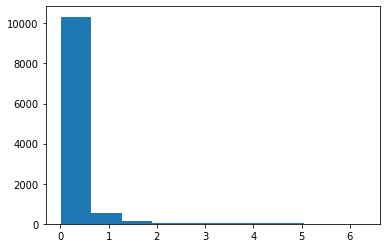

In [7]:
plt.hist(dfMean)

(array([2.963e+03, 3.707e+03, 2.327e+03, 1.207e+03, 5.590e+02, 3.230e+02,
        9.700e+01, 6.000e+00, 2.000e+00, 3.000e+00]),
 array([0.07361606, 0.36835508, 0.6630941 , 0.95783312, 1.25257214,
        1.54731116, 1.84205018, 2.13678921, 2.43152823, 2.72626725,
        3.02100627]),
 <a list of 10 Patch objects>)

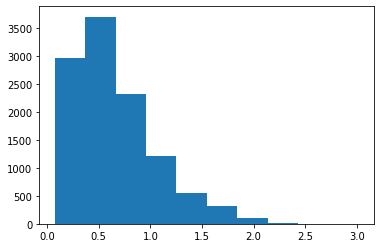

In [8]:
plt.hist(dfStdDev)